In [1]:
import geopandas 
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.shapereader as shpreader
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import shapely.geometry as sgeom
from   matplotlib.pyplot import imread

%matplotlib inline

In [2]:
hispaniola_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/hispaniola.shp')
división_prov_muni_y_dist_muni = geopandas.read_file('../shape_files/rd_shapes/vectores/División_Prov_Muni_y_Dist_MuniUTM.shp')
limite_gdf                     = geopandas.read_file('../shape_files/rd_shapes/vectores/limite_frontera.shp')
fay_gdf                        = geopandas.read_file('../shape_files/rd_shapes/vectores/FAY.shp')
silueta_haiti_gdf              = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_haiti.shp')
silueta_rd_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_rd.shp')
PROVINCIAS_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/PROVINCIAS.shp')
RIOS_gdf                       = geopandas.read_file('../shape_files/rd_shapes/vectores/RIOS.shp')
cuencas_hidro_gdf              = geopandas.read_file('../shape_files/rd_shapes/cuencas_hidrograficas_rd/Cuencas_Hidrograficas_RD.shp')
cuencas_presas_gdf             = geopandas.read_file('../shape_files/rd_shapes/cuencas_presas/Presas-CuencasAporte.shp')




hispaniola_gdf                 = hispaniola_gdf.to_crs("EPSG:4326")
división_prov_muni_y_dist_muni = división_prov_muni_y_dist_muni.to_crs("EPSG:4326")
limite_gdf                     = limite_gdf.to_crs("EPSG:4326") 
fay_gdf                        = fay_gdf.to_crs("EPSG:4326") 
silueta_haiti_gdf              = silueta_haiti_gdf.to_crs("EPSG:4326") 
silueta_rd_gdf                 = silueta_rd_gdf.to_crs("EPSG:4326") 
PROVINCIAS_gdf                 = PROVINCIAS_gdf.to_crs("EPSG:4326")
RIOS_gdf                       = RIOS_gdf.to_crs("EPSG:4326")
cuencas_hidro_gdf              = cuencas_hidro_gdf.to_crs("EPSG:4326")
cuencas_presas_gdf             = cuencas_presas_gdf.to_crs("EPSG:4326")

In [3]:
cuencas_presas_gdf = cuencas_presas_gdf.drop(columns=['ACUEDUCTM3', 'AREA', 'PERIMETER', 'ACRES', 
                                                      'HECTARES', 'Km', 'ENCLOSED_A', 'ISLAND_ARE', 'Id', 'LAYER',
                                                      'GM_TYPE', 'PROPOSITO', 'RIEGO_HA', 'POTENCIA_M', 'OPERACIO_1',
                                                      'GEN_GWH_A', 'REGION_HID', 'COTA_OPERA', 'ENCLOSED_1', 
                                                      'ENCLOSED_2', 'ELEVATION', 'NAME', 'GM_LAYER', 'TIPO_PRESA',
                                                      'ALTURA_MTS', 'RIO', 'V_DIS_MM3', 'V_S_BATMM3'])


In [4]:
#../shape_files/rd_shapes/vectores

# /hispaniola.shp
# /silueta_hispaniola.shp
# /EMILY 1987.shp
# /hispaniola_reprojected.shp
# /limite_elias_pina.shp
# /Isabel 1985.shp
# /EstacionesPluviometricas.shp
# /solo.shp
# /Edificios Centro Santo Domingo.shp
# /POBLADOS.shp
# /RIOS.shp
# /limite_frontera.shp
# /silueta_rd.shp
# /calles Centro Santo DomingoUTM19N.shp
# /División_Prov_Muni_y_Dist_MuniUTM.shp
# /cuenca del OZAMA.shp
# /FRAN 1996.shp
# /División_Prov_Muni_y_Dist_MuniWGS84codifCorrecta.shp
# /PROVINCIAS.shp
# /Lagos_Principales_RD.shp
# /ODETTE.shp
# /División_Prov_Muni_y_Dist_MuniWGS84.shp
# /FAY.shp
# /VIAS.shp
# /silueta_haiti.shp
# /El gran Santo Domingo.shp

In [5]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

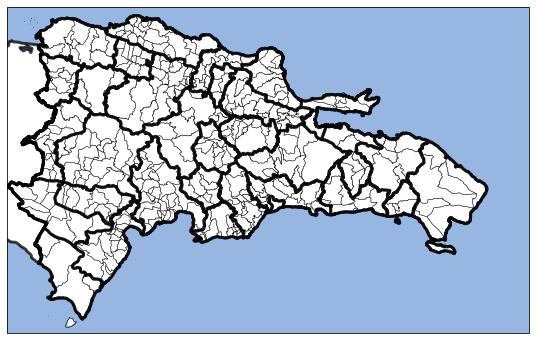

In [6]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(división_prov_muni_y_dist_muni['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(limite_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)
ax.add_geometries(silueta_haiti_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)  
ax.add_geometries(silueta_rd_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)
ax.add_geometries(PROVINCIAS_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)



In [7]:
nombres = ['Bao', 'Tavera', 'Sabaneta', 'Sabana Yegua', 'Rincon', 'Moncion', 'Jiguey', 'Valdesia', 'Hatillo', 
          'Moncion', 'Tavera-bao', 'Valdesia', 'Hatillo', 'Rincon', '', 'Tavera-Bao', 'Jiguey', 'Sabaneta', 
          'Sabana Yegua']

cuencas = ['Yaque del Norte', 'Yaque del Norte', 'Yaque del Sur', 'Yaque del Sur', 'Yuna-Camu', 
           'Yaque del Norte', 'Nizao', 'Nizao', 'Yuna-Camu', 'Yaque del Norte', 'Yaque del Norte', 'Nizao',
           'Yuna-Camu', 'Yuna-Camu', '', 'Yaque del Norte', 'Nizao', 'Yaque del Sur', 'Yaque del Sur']

cuencas_presas_gdf['Nombre'] = nombres
cuencas_presas_gdf['Cuenca'] = cuencas

cuencas_presas_gdf = cuencas_presas_gdf[['Nombre', 'Cuenca', 'geometry']]

#cuencas_presas_gdf = cuencas_presas_gdf.drop(14)
cuencas_presas_gdf_ = cuencas_presas_gdf[:9]
cuencas_presas_gdf_


,Nombre,Cuenca,geometry
0,Bao,Yaque del Norte,"POLYGON ((-70.69893 19.20220, -70.69855 19.201..."
1,Tavera,Yaque del Norte,"POLYGON ((-70.51781 19.02399, -70.51754 19.021..."
2,Sabaneta,Yaque del Sur,"POLYGON ((-71.12017 19.07331, -71.11916 19.072..."
3,Sabana Yegua,Yaque del Sur,"POLYGON ((-70.60077 18.70377, -70.60041 18.703..."
4,Rincon,Yuna-Camu,"POLYGON ((-70.37973 19.05245, -70.38121 19.051..."
5,Moncion,Yaque del Norte,"POLYGON ((-71.08654 19.32055, -71.08635 19.318..."
6,Jiguey,Nizao,"POLYGON ((-70.31849 18.68039, -70.31833 18.680..."
7,Valdesia,Nizao,"POLYGON ((-70.21274 18.42545, -70.21261 18.424..."
8,Hatillo,Yuna-Camu,"POLYGON ((-70.17635 19.01300, -70.17593 19.012..."


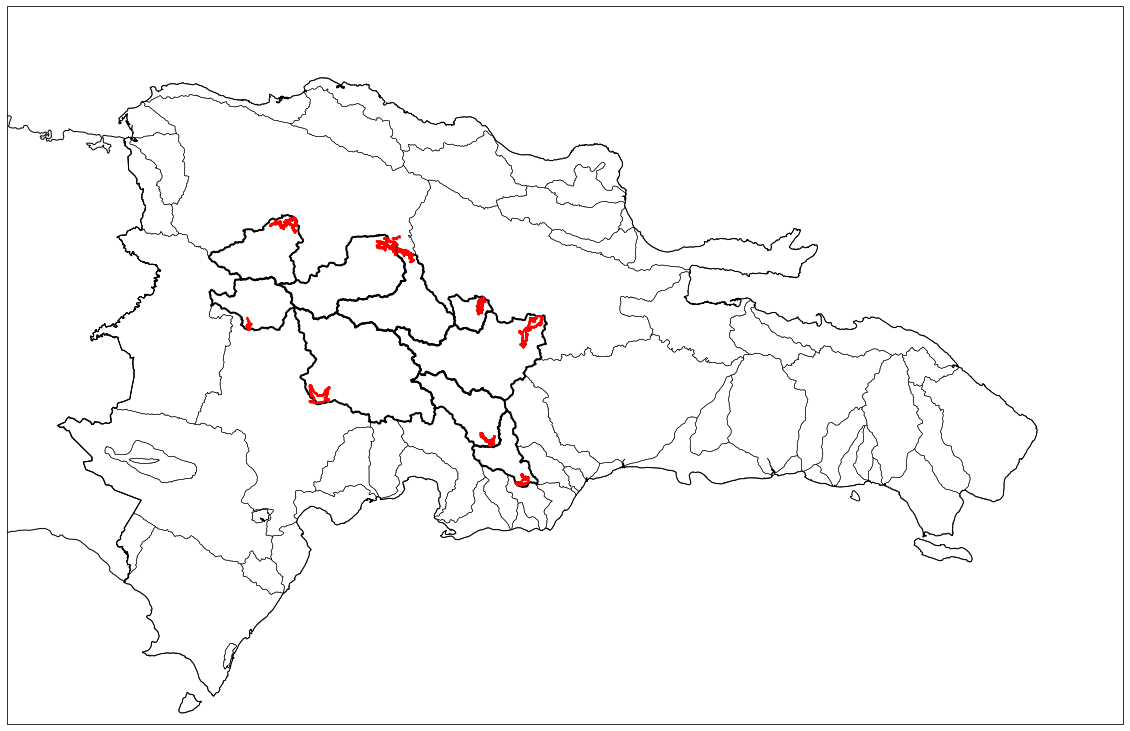

In [8]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72.2, -68, 17.5, 20.2])

cuencas = ['NIZAITO', 'NIZAO', 'YAQUE DEL SUR', 'OZAMA', 'ALTO YUNA', 'HAINA', 'YAQUE DEL NORTE']
cuenca_extracted = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == cuencas[6]]

ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=1)
ax.add_geometries(cuencas_hidro_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=0.5)

ax.add_geometries(cuencas_presas_gdf['geometry'][:9], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=2)

ax.add_geometries(cuencas_presas_gdf['geometry'][9:], crs=data_crs, facecolor='none',
                  edgecolor='red', linewidth=2)
# ax.add_geometries(cuenca_extracted['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=2)

YAQUE DEL SUR: 30-50
OZAMA: 150-200
ALTO YUNA: 150-200
YAQUE DEL NORTE: 75-100
HAINA: 200-250
Bao: 100-150
Tavera: 100-150
Sabaneta: 50-75
Sabana Yegua: 75-100
Rincon: 200-250
Moncion: 75-100
Jiguey: 200-250
Valdesia: 200-250
Hatillo: 150-200


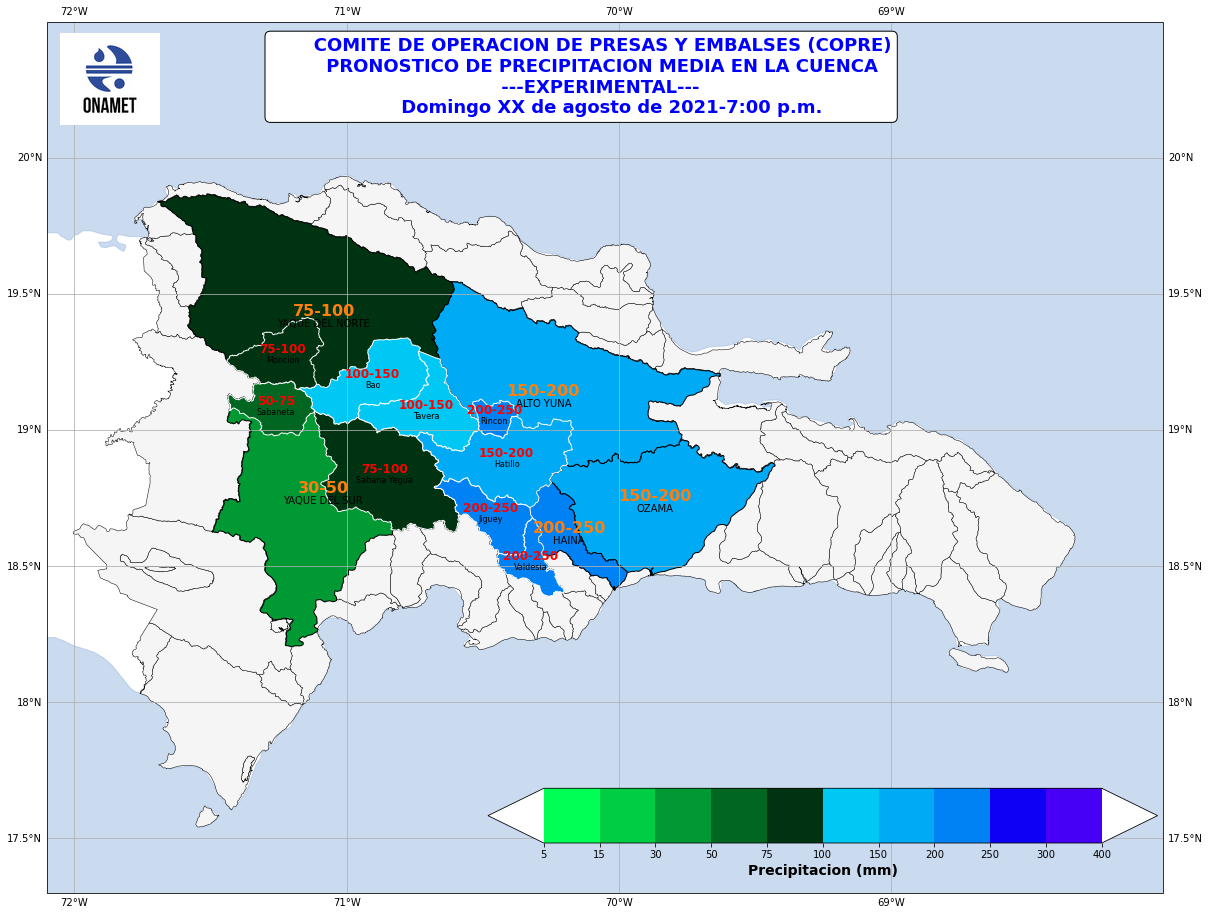

In [9]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72.1, -68, 17.3, 20.5])

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
#                   edgecolor='black', linewidth=1)
ax.add_geometries(cuencas_hidro_gdf['geometry'], crs=data_crs, facecolor='whitesmoke',
                  edgecolor='black', linewidth=0.5)
ax.add_feature(cfeat.OCEAN.with_scale('10m'), alpha = 0.5)

values_and_colors = {
                     'values': ['5-15'   , '15-30'  , '30-50'  , '50-75'  , '75-100', '100-150', '150-200',  
                                '200-250', '250-300', '300-400', '400-500'], 
    
                     'colors': ['#00FF55',  '#00CC44',  '#009933',   '#006622',  '#003311',  '#00C8F5',  
                                '#00AAF5',  '#0082F5',  '#0D00F5',   '#4700F5',  '#8B00F5'] 
                     }
mean_pp_in_the_watersheds =  {#'NIZAO'          : ['#00FF55', '5-15'],
                              'YAQUE DEL SUR'  : ['#00FF55', '5-15'],
                              'OZAMA'          : ['#00FF55', '5-15'],
                              'ALTO YUNA'      : ['#00FF55', '5-15'],
                              'YAQUE DEL NORTE': ['#00FF55', '5-15'],
                              'HAINA'          : ['#00FF55', '5-15']
                              
                             }
mean_pp_in_the_dams       =  {
                             'Bao'             : ['#8B00F5', '400-500'],
                             'Tavera'          : ['#8B00F5', '400-500'],
                             'Sabaneta'        : ['#8B00F5', '400-500'],
                             'Sabana Yegua'    : ['#8B00F5', '400-500'],
                             'Rincon'          : ['#8B00F5', '400-500'],
                             'Moncion'         : ['#8B00F5', '400-500'],
                             'Jiguey'          : ['#8B00F5', '400-500'],
                             'Valdesia'        : ['#8B00F5', '400-500'],
                             'Hatillo'         : ['#8B00F5', '400-500']
                             }
# pp = []
# cuencas_hidro_gdf = cuencas_hidro_gdf.loc[[47, 48, 50, 54, 55]] #NIZAO_idx = 28
# for watersheds in mean_pp_in_the_watersheds.keys():
#     _  = str(input(f'{watersheds}: '))
#     __ = values_and_colors['values'].index(_)
#     mean_pp_in_the_watersheds[watersheds] = [values_and_colors['colors'][__], _]
#     pp.append(_)
# cuencas_hidro_gdf['PP'] = pp
# cuencas_hidro_gdf = cuencas_hidro_gdf[['NOMBRE', 'PP', 'geometry']]

pp = ['5-15', '5-15', '5-15', '5-15', '5-15']
pp = []
cuencas_hidro_gdf = cuencas_hidro_gdf.loc[[47, 48, 50, 54, 55]] #NIZAO_idx = 28
for watersheds in mean_pp_in_the_watersheds.keys():
    for attempt in range(3):
        try:
            _  = str(input(f'{watersheds}: '))
            __ = values_and_colors['values'].index(_)
        except ValueError:
            print('Este rango no esta permitido.')
            continue
        break
    else:
        print('numero de intentos agotados')
        break
    mean_pp_in_the_watersheds[watersheds] = [values_and_colors['colors'][__], _]
    pp.append(_)
if pp:
    cuencas_hidro_gdf['PP'] = pp
    cuencas_hidro_gdf = cuencas_hidro_gdf[['NOMBRE', 'PP', 'geometry']]
    
pp = ['400-500', '400-500', '400-500', '400-500', '400-500', '400-500', '400-500', '400-500', '400-500']
pp = []
cuencas_presas_gdf = cuencas_presas_gdf[:9] 
for watersheds in mean_pp_in_the_dams.keys():
    for attempt in range(3):
        try:
            _  = str(input(f'{watersheds}: '))
            __ = values_and_colors['values'].index(_)
        except ValueError:
            print('Este rango no esta permitido.')
            continue
        break
    else:
        print('numero de intentos agotados')
        break
    mean_pp_in_the_dams[watersheds] = [values_and_colors['colors'][__], _]
    pp.append(_)
if pp:
    cuencas_presas_gdf['PP'] = pp
    cuencas_presas_gdf = cuencas_presas_gdf[['Nombre', 'Cuenca', 'PP', 'geometry']]
                                                
# pp = []
# cuencas_presas_gdf = cuencas_presas_gdf[:9]
# for watersheds in mean_pp_in_the_dams.keys():
#     _  = str(input(f'{watersheds}: '))
#     __ = values_and_colors['values'].index(_)
#     mean_pp_in_the_dams[watersheds] = [values_and_colors['colors'][__], _]
#     pp.append(_)
# cuencas_presas_gdf['PP'] = pp
# cuencas_presas_gdf = cuencas_presas_gdf[['Nombre', 'Cuenca', 'PP', 'geometry']]


for cc_name in mean_pp_in_the_watersheds.keys():
    cc_subset = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == cc_name]
    _ = mean_pp_in_the_watersheds[cc_name][0]
    ax.add_geometries(cc_subset['geometry'], facecolor=_,
                     edgecolor='black', crs=data_crs,
                     linewidth=1)


for cc_name in mean_pp_in_the_dams.keys():
    cc_subset = cuencas_presas_gdf_[cuencas_presas_gdf_['Nombre'] == cc_name]
    _ = mean_pp_in_the_dams[cc_name][0]
    ax.add_geometries(cc_subset['geometry'], facecolor=_,
                     edgecolor='white', crs=data_crs,
                     linewidth=1)
       
cuencas_hidro_gdf.apply(lambda   x: ax.annotate(text=x.NOMBRE, xy=x.geometry.centroid.coords[0], 
                                              fontsize = 10, ha='center', weight = 'normal', 
                                              va = 'top'), axis=1)
cuencas_hidro_gdf.apply(lambda   x: ax.annotate(text=x.PP, xy=x.geometry.centroid.coords[0], 
                                              color = 'tab:orange', ha='center', weight = 'bold', 
                                              fontsize = 16, va = 'bottom'), axis=1)

cuencas_presas_gdf_.apply(lambda x: ax.annotate(text=x.Nombre, xy=x.geometry.centroid.coords[0], 
                                                fontsize = 8, ha='center', weight = 'normal', 
                                                va = 'top'), axis=1)
cuencas_presas_gdf.apply(lambda  x: ax.annotate(text=x.PP, xy=x.geometry.centroid.coords[0], 
                                               color = 'red', ha='center', weight = 'bold', 
                                               fontsize = 12, va = 'bottom'), axis=1)

props = dict(boxstyle='round', facecolor='white', alpha=1)
xtxt = 0.2
ytxt = 0.983
text = ['''       COMITE DE OPERACION DE PRESAS Y EMBALSES (COPRE)
         PRONOSTICO DE PRECIPITACION MEDIA EN LA CUENCA
                                     ---EXPERIMENTAL---
                     Domingo XX de agosto de 2021-7:00 p.m.''']
        
ax.text(xtxt, ytxt, text[0], transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')

colorbar = imread('colorbar.png')
fig.figimage(colorbar, 380, 0, zorder=100)

logo = imread('onamet-logo.jpg')
fig.figimage(logo, 60, 790, zorder=100)

In [10]:
x = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == 'YAQUE DEL SUR']
x.NOMBRE
a =list(x.geometry.centroid)[0].coords[0][0]
b =list(x.geometry.centroid)[0].coords[0][1] + 0.2
b
# ax.annotate(text=x.NOMBRE, xy=(a,b) 
#                                , 
#                                               fontsize = 10, ha='center', weight = 'bold', 
#                                               va = 'top')

/tmp/ipykernel_10860/2334167208.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a =list(x.geometry.centroid)[0].coords[0][0]
/tmp/ipykernel_10860/2334167208.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  b =list(x.geometry.centroid)[0].coords[0][1] + 0.2


18.957601341233403

In [11]:
for i in range(100):
  for attempt in range(10):
    try:
        break
      # do thing
    except:
      # perhaps reconnect, etc.
        break
    else:
      break
  else:
    # we failed all the attempts - deal with the consequences.
    break


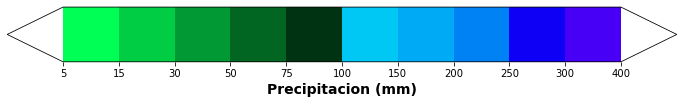

In [12]:
import matplotlib as mpl 


fig, ax = plt.subplots(figsize=(12, 2))
fig.subplots_adjust(bottom=0.5)


cmap = mpl.colors.ListedColormap(['#00FF55',  '#00CC44',  '#009933',   '#006622',  '#003311',  '#00C8F5',  
                                  '#00AAF5',  '#0082F5',  '#0D00F5',   '#4700F5',  '#8B00F5'])
# cmap = mpl.colors.ListedColormap(['red',  'blue',  'green',   'yellow',  'black',  'white',  
#                                   'darkgray',  'brown',  'pink',   'violet',  'purple'])
bounds = [5, 15, 30, 50, 75, 100, 150, 200, 250, 300, 400, 500]
cmap.set_over('none')
cmap.set_under('none')
norm = mpl.colors.BoundaryNorm(bounds, cmap.N + 1)
cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds,
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Precipitacion (mm)', fontsize = 14, weight = 'bold')
#plt.savefig('colorbar.png', transparent=True)


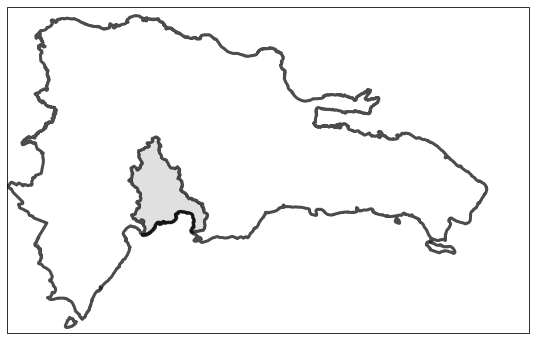

In [13]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72, -68, 17.5, 20])

hispaniola_gdf = hispaniola_gdf.loc[hispaniola_gdf['name']       == 'República Dominicana']
PROVINCIAS_gdf = PROVINCIAS_gdf.loc[PROVINCIAS_gdf['Provincia_'] == 'Azua']

ax.add_geometries(PROVINCIAS_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='black', linewidth=3, alpha=0.7)
ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=3, alpha=0.7)

In [14]:
a = list(silueta_rd_gdf['geometry'][0][76].exterior.coords
        )


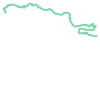

In [15]:
from shapely.geometry import LineString

countries_gdf= geopandas.read_file('../shape_files/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
silueta = countries_gdf.loc[countries_gdf['ADMIN'] == 'Dominican Republic']

p = list(silueta['geometry'])[0][0].exterior.coords[0:200]

line = LineString(p)

line

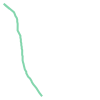

In [16]:
from shapely.geometry import LineString

p = list(silueta_rd_gdf['geometry'])[0][76].exterior.coords[0:50]

line = LineString(p)
line

In [17]:
p = len(list(silueta['geometry'])[0][0].exterior.coords)

p

546

In [18]:
p = len(list(silueta_rd_gdf['geometry'])[0][76].exterior.coords)

p

50887

In [19]:
# for polygon in silueta_rd_gdf['geometry'][0]:  # same for multipolygon.geoms
#     print(polygon)
#     #shapely.ops.split(polygon, breakingpoints_rd_2021_reordered.iloc[0:2])